In [2]:
import cv2
import skimage as io
import matplotlib.pyplot as plt

c:\Users\nalinr\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\nalinr\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\nalinr\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
#function which takes an image as an input and gives its clahe form as Output (all in Grayscale format)
def equ_clahe(filepath,clip_limit):
    img=cv2.imread(filepath,1)
    grey_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    equ_img=cv2.equalizeHist(grey_img)
    clahe=cv2.createCLAHE(clipLimit=clip_limit,tileGridSize=(8,8))
    clahe_img=clahe.apply(grey_img)
    return grey_img,equ_img,clahe_img
    

In [4]:
#function to plot equalized image and CLAHE image
def plot(img1,img2):
    plt.subplot(1,2,1)
    plt.title("Image1")
    plt.imshow(img1,cmap='gray')

    plt.subplot(1,2,2)
    plt.title("Image2")
    plt.imshow(img2,cmap='gray')


In [5]:
#function to plot histogram representations of images
def hist_plot(img1,img2):
    plt.subplot(1,2,1)
    plt.title("Image1_hist")
    plt.hist(img1.ravel(),256,[0,256]);  

    plt.subplot(1,2,2)
    plt.title("Image2_hist")
    plt.hist(img2.ravel(),256,[0,256]);  

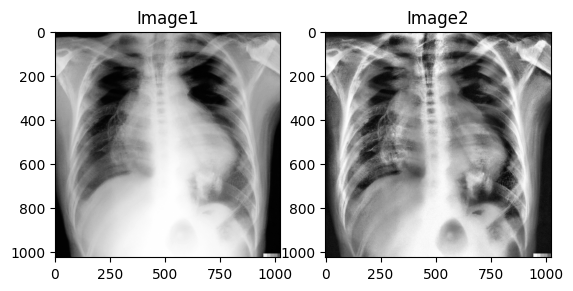

In [18]:
img,equ_img,clahe_img=equ_clahe('C:\Medical Image Enhancement\images\lc_Xray.png',5.0)
plot(img,clahe_img)

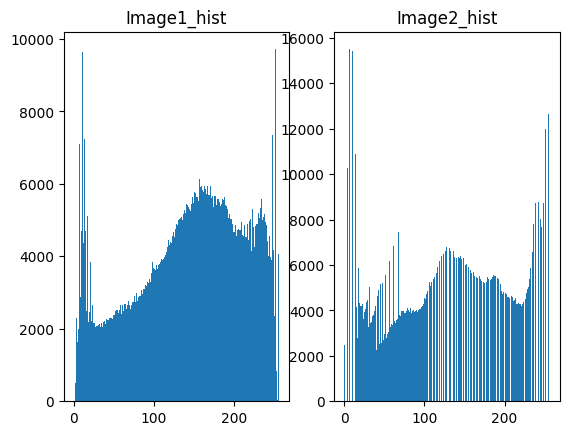

In [7]:
hist_plot(clahe_img,equ_img)

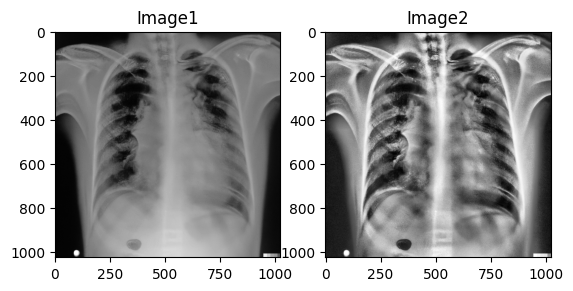

In [15]:
img_1,equ_img_1,clahe_img_1=equ_clahe('C:\Medical Image Enhancement\images\lc_xray_1.png',6.0)
plot(img_1,clahe_img_1)

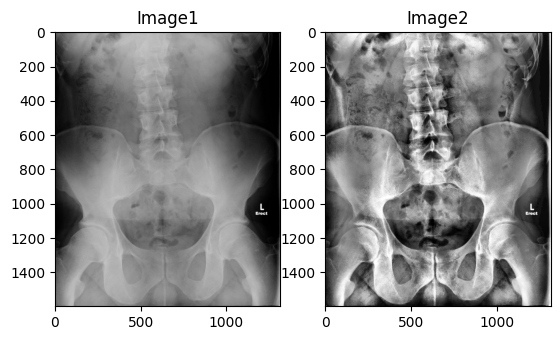

In [11]:
img_2,equ_img_2,clahe_img_2=equ_clahe('C:\Medical Image Enhancement\images\R.jpg',10.0)
plot(img_2,clahe_img_2)